# Introduction to Deep Learning with Keras 1

### 5th Summer School on INtelligent signal processing for FrontIEr Research and Industry, Wuhan, May 2019

This is a dense introduction to **deep learning** (DL)!

For an in-depth introduction, there are a several free online books:

* http://neuralnetworksanddeeplearning.com/index.html by Michael Nielsen, a concise introduction.
* http://www.deeplearningbook.org/ Deep Learning by Ian Goodfellow, Yoshua Bengio and Aaron Courville, provides a detailed introduction to the theoretical background.
* https://torres.ai/first-contact-deep-learning-practical-introduction-keras/ by Jordi Torres, an introduction similar to this tutorial by the use of Keras.
* https://d2l.ai/ by A. Zang et al., another excellent resource but with code examples in Gluon/MXNet (https://gluon.mxnet.io/) instead of Keras.
* https://deepai.org/data-science-glossary/a A useful glossary!
* https://developers.google.com/machine-learning/glossary/ another glossary.


## What is a Neural Network?
### What is Machine Learning?
In machine learning (ML) we try to adopt(=**learn**) a certain model to some data. 

Linear regression is the easiest example. Some data is given and a regression line (predicted value $\widehat{y}$) is fitted to the data: 

$\widehat{y}(x)=ax+b$ <br>

with data $x^{(i)},y^{(i)} \in R$ and $i=1 \dots N_{data}\;$ the data points in our dataset.

There are two principal ways to do machine learning:

* Supervised
* Unsupervised

We are interested in **supervised machine learning**. Supervised means that we have some data where we know the true values, for example the $y$-values in the regression problem where we know for each $x_i$ the corresponding $y_i$. 

The 2 parameters ($a$,$b$) of the fit (regression line) are then extracted from the dataset $\{x^{(i)},y^{(i)}\}$, for example by a Least Square approach where we choose $a,\;b$ such that the squares are minimized: 

$\min_{wrt. a,b} \sum_{i=1}^{N_{data}} (\widehat{y}\,(x^{(i)}|\,a,b)-y^{(i)})^2$ 

This sum of squares is an example for a **loss function**: The complete dataset is mapped onto one number which represents the quality how well our model describes the data. The best model parameters are given by the set of parameters ($a$,$b$) that **minimizes** the loss. 
Other names for loss are objective or cost function.

While this simple regression model only contains 2 parameters, a typical deep neural network may contain ~1000000 or more parameters, and our dataset will be
in general high dimensional $\mathbf{x}^{(i)}=(x^{(i)}_1,\dots,x^{(i)}_n) \in \cal{R}^n$. BTW the input components $x_i$ are traditionally called **features** in machine learning.

Supervised learning can be subdivided into:
* Regression
* Classification

In **classification**, we do not have a real value $y$ but a class label $y^{(i)}=\{0,1\}$. For example, when the dataset consists of two groups, like "Cats=0" and "Dogs=1" or Background and Signal. First, the regression case is considered. For classification see the "Intro_DL_with_Keras_2" notebook.


### Which elements are needed to build a neural network (NN)?

* A neural network consists of several **layers**.
* Each layer consists of several **nodes**. The nodes are also called **neurons**.

The node is considered to be a model for a neuron. Like a neuron, it has several inputs $x_k$  and one output. Each input is multiplied with a **weight** $w_k$ and the output depends on the sum of the inputs (and a **bias** term $b$)  transformed by some **activation function** $\mathbf{f}$.

$f(\sum_{k=1}^n w_k x_k +b)$  

<img src="img/sum.png" width="200" >

When several neurons are joined into a Layer, we get multiple outputs that we can represent by a vector and the weights become a weight matrix (dropping the bias $b$ for the simplicity of the image):

<img src="img/nodes.png" width="200" >

That we talk about neurons is a mainly a historical artefact. We have a multi-linear model, **each layer is a matrix multiplication**, where each component is then mapped by a non-linear activation function.

$f[\mathbf{W}\cdot \overrightarrow{x} +\overrightarrow{b}]$ 

Here, we write $f[x]$ to note that the activation function is applied to each component separately. 


Complex models are built by chaining multiple layers with appropriate activation functions.


<img src="img/net.png" width="300" > 

For more complicated networks, the layers will become multi-dimensional arrays not just matrices. The most general way to describe the node is to consider it as a tensor (that's why it is called Tensorflow).

## Activation Functions

A chain of matrix operation would be trivial. 
All non-linearity of a NN comes from the activation functions.
There are several choices for the function that is wrapped around the linear node:
$f[\mathbf{W}\cdot \overrightarrow{x} +\overrightarrow{b}]$. https://en.wikipedia.org/wiki/Activation_function

***

Early (1990-2000) neural networks had mainly been constructed with the hyperbolic tangent:

<img src="img/Activation_tanh.png" width="200" >$tanh$  
***
The most important activation function is now the _Rectified Linear Unit_, short **ReLU**. Introducing the ReLU had been a game changer for the training of deep neural networks. 

<img src="img/Activation_rectified_linear.png" width="200" > $f(x)=\left\{\begin{array}{ll}{0} & {\text { for } x<0} \\ {x} & {\text { for } x \geq 0}\end{array}\right.$
***
A third important activation is the **logistic function**, aka sigmoid. 
The logistic function is the optimal choice if the NN represents a probability. It maps all input into the range $[0,1]$, as it should be for a proper probability.

<img src="img/Activation_logistic.png" width="200" >$f(x)=\frac{1}{1+\exp({-x})}$  
***

Neural nets are built with the help of deep learning libraries, for example **Tensorflow** https://www.tensorflow.org (in China http://www.tensorfly.cn). 
Since the Tensorflow "language" is somewhat complicated there are additional libraries that simplify
the building of neural networks. They add an additional layer on top of the actual deep learning library. A popular choice for such a wrapper is **Keras**. 
<br>
Keras had been originally developed as an independent library (which still exists https://keras.io/) but it has been meanwhile integrated into Tensorflow https://www.tensorflow.org/api_docs/python/tf/keras and has become the default approach in the coming Tensorflow 2.0.

Tensorflow or Keras are Python libraries that provide all tools to define a neural network and to train them.
<br>
The style in which the matrix operations are implemented **resembles NumPy**. The data is represented by multi-dimensional arrays.

In [1]:
# We take the keras implementation from tensorflow
from tensorflow import keras
from tensorflow.keras import layers,models
# To suppress deprecation warnings in some environments
from tensorflow import logging
logging.set_verbosity(logging.ERROR)

A layer is the base element to build a NN. In Keras, the simplest layer is the `Dense` class.
<br>
**`layers.Dense(units,activation)`**
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
<br>
The minimum information Keras needs are the number _units_ $\equiv$ _nodes_ $\equiv$ _neurons_ within this layer and the activation function. 
<br>
The following creates a layer with 30 nodes where each node uses the **ReLU** function as activation function.

In [2]:
one_layer = layers.Dense(30, activation='relu')

A NN is a chain of layers. We need a way to put several layers into one model. 
<br>
In Keras all networks belongs to the `model` class and the simplest `model` is just a sequential chain of layers
<br>
**models.Sequential( list_of_layers )** https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential

In [3]:
model = models.Sequential([
    layers.Dense(20, activation='relu', input_dim=10),
    layers.Dense(30, activation='relu')]
)

As explained above, a layer is (mainly) a matrix, as such it has two dimensions, the number of inputs and the number of outputs. Keras tries to figure out the correct array dimensions from the previous layer. For the first layer we have to give the number of inputs, **input_dim**, explicitly.

If we write this model down as a formula:

$model = \mathrm{ReLu}\Big[ W_2 \cdot\mathrm{ReLu}\big[W_1\cdot x+b_1\big] + b_2\Big]$

Keras figured out that the first layer is a 10x20 array (matrix) and the second layer a 20x30 array (to match the dimension of the previous layer). By default, each node gets a bias term. Our model has 20+30=50 bias terms. It contains in total 850 parameters (weights and biases).

In [4]:
# model.summary() prints the list of layers and parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


We see
* The type of the layers and order in the model
* The output shape of each layer (Here, the 2nd dim is None.)
* The number of parameters (weights, biases) in each layer

The layers between the input and output layer are called **hidden layers**.

In [5]:
# Alternatively, we can add a layer to an already defined model
model.add(layers.Dense(1))

We also can plot the model:

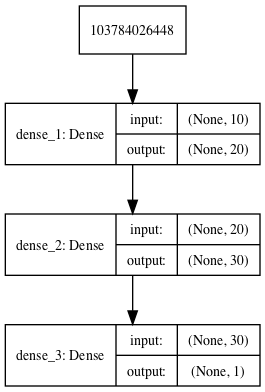

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)
from IPython.display import Image
Image(retina=True, filename='model.png')
# The box with large integer in the first box is a bug in plot_model 

***
Such a model can be used for regression. As described above, we are doing supervised learning. That means we know some target value $y$, and we can quantify the difference between our model and the true value with the help of some loss function.

Keras provides the mean squared error loss function, we mentioned above.<br>
**losses.mean_squared_error(y_true, y_pred)** https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError

Before we continue, we need some example data to play with. We will create some random toy data.

In [7]:
import numpy as np
# We create 10000 random vectors each 10-dim
N_samples=10000
N_in=10
# A matrix N_samplesxN_in, uniform in [0,1)
x_train=np.random.rand(N_samples,N_in)
# Sum of squares along N_in
z = np.sum( np.square(x_train),axis=1)
y_train = np.sin(z)


The toy data consists of a sine over a parabola in a 10-dimensional space:

 $$y=\sin(\sum_{k=1}^{10} x_k^2)$$

The positions $\mathbf{x}$ are randomly picked from $x_k\in\left[0,1\right]$. If we plot this, there is no easy visible connection between the $\{x_k\}\;$ and $y$. This is a good example for some data that looks random but  contains some hidden structure that can be learned by a NN.

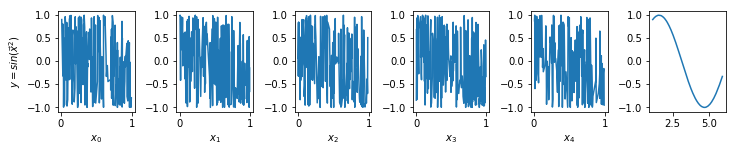

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(1,6,figsize=(10,2))
fig.tight_layout()
axs[0].set_ylabel(r'$y=sin(\vec{x}^2$)')
for i in range(5):
    idx=np.argsort(x_train[:200,i]) # we plot only the first 200 samples
    axs[i].plot(x_train[idx,i],y_train[idx])
    axs[i].set_xlabel(r'$x_{}$'.format(i))
z=np.sum(np.square(x_train[:200]),axis=1)
idx=np.argsort(z)
plt.plot(z[idx],y_train[idx])
plt.show()
# As example, the first 5 inputs - they just look like noise
# but the information (sine curve) is hidden in the data.
# We can see it when we calculate the square and sort the values 
#(argsort gives an index such that the array values are accessed in increasing order)

***
Back to our neural network. What we have done so far is summarized in the next cell. We have built a sequential model with 3 layers and ReLU activation functions, and we choose the **Mean Square Error** as loss function.

In [9]:
from tensorflow.keras import models, layers, losses, optimizers
from time import time
model = models.Sequential(
    [
        layers.Dense(20, activation='relu', input_dim=10),
        layers.Dense(30, activation='relu'),
#        layers.Dense(100, activation='relu'),
        layers.Dense(1)
    ]
)
optimizer = optimizers.SGD(lr=0.01)
#optimizer = optimizers.SGD(lr=0.02,momentum=0.95)
#optimizer = optimizers.Adam(lr=0.001)

model.compile(optimizer=optimizer,loss='mse')

#start_time=time()
#histObj = model.fit(x_train, y_train, batch_size=32, epochs=20)
#print('Total training time:{:6.2f} sec'.format(time() - start_time))

In the last line in the above cell, we configure the complete Keras model for training. This is done by the `compile` method.

There are two new elements to note:

* The Loss function which is simply giving by the named argument:`loss=`'mse'.

* The **optimizer** which is defined by providing an instance as argument.

Up to now we only said that the parameters should be _optimized_ in a way that the loss becomes minimal. For the NN training this is done technically by some variant of **Stochastic Gradient Descent** https://en.wikipedia.org/wiki/Stochastic_gradient_descent.

Gradient descent is an optimization method where we calculate the gradient of our loss function with respect to the NN parameters (weights and biases). This gradient is iteratively used to update the parameter estimates until we reach, step by step, the best parameter values $\;\equiv\;$ the minimum of the loss function.

_Stochastic_ gradient descent (SGD) is a variant where we use only a random subsample of our data, the **Batch**, for one iteration step and not the full dataset. This makes the process noisier and helps to avoid local minima. Batching the data points is also computationally useful.



***
Now, we can train our model!

* The data is grouped in **batch**es of 32 data points.
    * The data points in the batches are picked in random order until all data points from the dataset are used.
* One **Epoch** is over when all data points have been used once.
    * The training continue with the same data according to the chosen number of epochs.

We start with a batch size of 32. This is traditionally considered to be a good compromise between performance and speed.
* Try to use a larger batch size. The training should be faster, but the loss may stay higher. The number of iterations per epoch will be smaller. The total number of iterations at the end of the training are important.
* We can also change the **learning rate** `lr`. A too small lr will result in slow learning. With a too high lr, the training may not converge.

Observe the loss.

In [10]:
# When you re-run this cell within the jupyter notebook, the model will not be reset
# Rerun the above cell with the model definitions 
# to make sure that your model is freshly initialized
histObj = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 0s 43us/sample - loss: 0.3220
Epoch 2/10
10000/10000 [==============================] - 0s 30us/sample - loss: 0.1829
Epoch 3/10
10000/10000 [==============================] - 0s 27us/sample - loss: 0.1041
Epoch 4/10
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0826
Epoch 5/10
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0774
Epoch 6/10
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0753
Epoch 7/10
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0734
Epoch 8/10
10000/10000 [==============================] - 0s 25us/sample - loss: 0.0725
Epoch 9/10
10000/10000 [==============================] - 0s 27us/sample - loss: 0.0717
Epoch 10/10
10000/10000 [==============================] - 0s 27us/sample - loss: 0.0709


### Learning Curve
The change of the loss over the training steps is called **learning curve**. Keras returns the `history` class when we do the `model.fit` step.
The history is recorded by default for each epoch in the `history` dictionary. We can add different metrics here. By default, it contains the loss after each epoch. 

In [11]:
print(histObj.history.keys())
histObj.params

['loss']


{'batch_size': 32,
 'do_validation': False,
 'epochs': 10,
 'metrics': ['loss'],
 'samples': 10000,
 'steps': None,
 'verbose': 1}

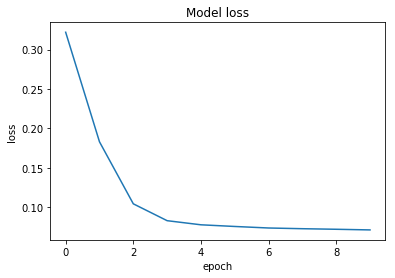

In [12]:
# The loss development over the epochs
plt.plot(histObj.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

The learning is the most important tool to control the learning process! The typical behavior behaviour is a quick drop in the beginning and slow improvement over the following epochs. As long as the curve is still falling it may be useful to continue the learning by choosing a larger number of epochs, although it often improves at some point only asymptotically.

### Predicting
Predicting with the trained network is easy. Just apply it to the data.

In [13]:
y_pred=model.predict(x_train)

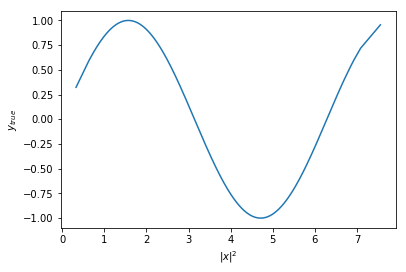

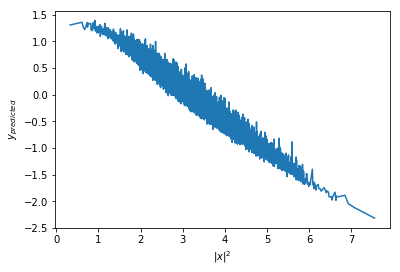

In [14]:
# First, we plot the truth
z=np.sum(np.square(x_train),axis=1)
idx=np.argsort(z)
plt.plot(z[idx],y_train[idx])
plt.ylabel(r'$y_{true}$')
plt.xlabel(r'$|x|^2$')
plt.show()

# Next, we plot the NN output
plt.plot(z[idx],y_pred[idx])
plt.ylabel(r'$y_{predicted}$')
plt.xlabel(r'$|x|^2$')
plt.show()

The last plot shows the NN prediction. It probably will not yet look like a sine. There are several ways to improve the model.

* Add an additional layer to the network, increase the number of nodes in the first 2 layers.
* Add momentum to the SGD optimizer (8.3.6) in https://www.deeplearningbook.org/contents/optimization.html.
* Or use a more refined optimizer. **Adam** is the _swiss army knife_ in NN training. It tries to adapt learning rate and other parameters automatically during the training.
* Increase the number of epochs, maybe 50.
* We aim for a loss of about $10^{-4}$ but be aware that the sine will stay noisy. 
* E.g.: (batch_size=256, adam(lr=0.001), 3 layers with 100 nodes) 
* There is no unique way to find the optimal training.

## Closing Remarks

* A neural network can be seen as a **function approximator**. Similar to a Taylor expansion or a Fourier Series, one can prove that a NN with at least one hidden layer can approximate any function https://en.wikipedia.org/wiki/Universal_approximation_theorem, http://neuralnetworksanddeeplearning.com/chap4.html.
* The optimizers used to train the networks have been developed over decades. They have reached a high level of sophistication and they are still subject to active research https://en.wikipedia.org/wiki/Stochastic_gradient_descent. There are many variants which are often picked for best performance in a trial and error approach.
* At the heart of all deep learning libaries are automatic differentiation tools. For minimizing with respect to all trainable weights and biases, the derivative of the loss function and the complete(!) neural network is needed. This is called **backpropagation**, the difference between the true and predicted values are _back-propagated_ in linear approximation from the loss to the trainable parameters http://neuralnetworksanddeeplearning.com/chap2.html.
The derivatives needed for this are calculated automatically from the code you define https://www.tensorflow.org/tutorials/eager/automatic_differentiation. 
* How we connect the individual nodes, i.e. the topology of the network, allows for a huge variaty of different models. We have seen here only a simple, **fully connected $\;\mathbf{\equiv}\;$ dense neural network**.